In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
# df is data frame
df = pd.read_csv('../data/salaries.csv')
df.head()

,years_of_experience,salary
0,5,3150
1,9,3787
2,4,2991
3,10,4551
4,8,3540


**Splitting into Features and Targets (X, Y)**

In [29]:
# for x it selects all rows (:) and everything EXCEPT last column (salary)
x = df.iloc[:,:-1]
x[0:5]

,years_of_experience
0,5
1,9
2,4
3,10
4,8


In [30]:
# for y it selects all rows and only salary column NOT years of experience
y = df.iloc[:,-1]
y[0:5]

0    3150
1    3787
2    2991
3    4551
4    3540
Name: salary, dtype: int64

**Data Visualization**

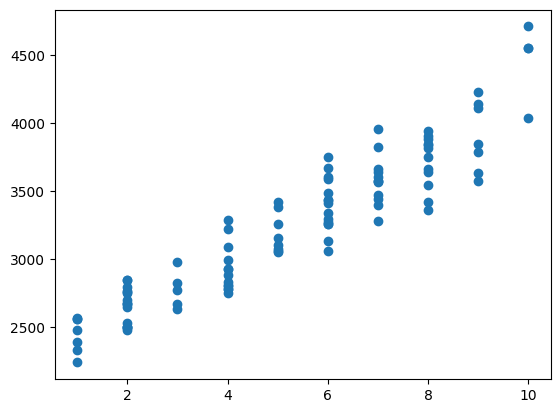

In [31]:
plt.scatter(x, y)

**Building and Training Model**

In [32]:
# random_state parameter disables the randomization of data that is categorized as training or testing set resulting in more stable data set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((80, 1), (20, 1), (80,), (20,))

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, Y_train)

LinearRegression()

In [35]:
model.predict([[7], [5], [3.5]])

/home/erielc/Documents/Github/CREPES/mlenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3587.02214514, 3201.70090715, 2912.70997866])

In [36]:
Y_pred = model.predict(X_test)
Y_pred

array([2816.37966916, 3779.68276414, 3009.04028815, 3779.68276414,
       3587.02214514, 2623.71905016, 4165.00400213, 3201.70090715,
       3587.02214514, 3009.04028815, 2431.05843116, 3587.02214514,
       3201.70090715, 3587.02214514, 3394.36152615, 3587.02214514,
       3779.68276414, 2623.71905016, 3201.70090715, 2816.37966916])

In [37]:
error = Y_pred - Y_test
error

26    147.379669
86    118.682764
2      18.040288
55     28.682764
75     12.022145
93    -48.280950
16   -542.995998
73    131.700907
54    -11.977855
95    125.040288
53     42.058431
92    190.022145
78    141.700907
13    306.022145
7     125.361526
30    -50.977855
22    141.682764
24    -74.280950
33    102.700907
8      49.379669
Name: salary, dtype: float64

Text(0, 0.5, 'Expected Salary')

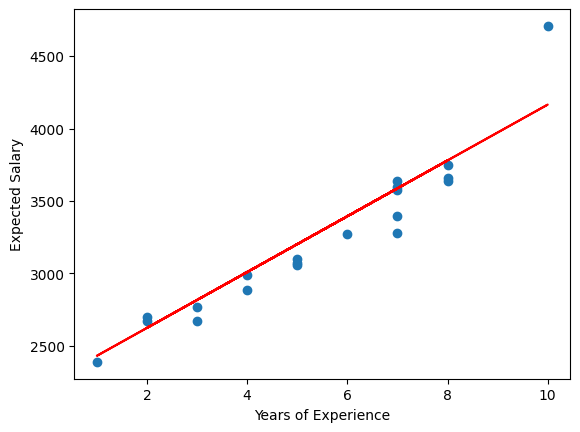

In [38]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Expected Salary")

In [39]:
r2 = r2_score(Y_test, Y_pred)
r2
# R2 is from 0 to 1 as closer to 1 means more accurate meaning is 89% model accuracy

0.8921287198195745